In [1]:
# matlab file 불러오기


# mat 파일 불러오기
mat_file = sio.loadmat(
    "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/result_bones/1682577_230119_mip.mat"
)
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MIP'])

In [3]:
mat_file["MIP"].shape

(512, 773, 8, 3)

In [10]:
bone_group = mat_file["MIP"][:, :, 2, 2]
bone_each = mat_file["MIP"][:, :, 2, 1]

In [1]:
import numpy as np
import os
import re
import scipy.io as sio
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# /projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/result_bones 폴더의 mat으로 끝나는 파일들 리스트 만들기


path = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/result_bones"
files = os.listdir(path)
mat_files = [f for f in files if re.match(".*mat$", f)]
mat_files

['3991651_240112_mip.mat',
 '4214049_220506_mip.mat',
 '10309237_210924_mip.mat',
 '8503999_230201_mip.mat',
 '8687345_230102_mip.mat',
 '10564066_220429_mip.mat',
 '10185908_220425_mip.mat',
 '5610875_221109_mip.mat',
 '4125533_220907_mip.mat',
 '10442401_220321_mip.mat',
 '8781135_220804_mip.mat',
 '3506602_221227_mip.mat',
 '10361613_230224_mip.mat',
 '8822541_211001_mip.mat',
 '5361245_240624_mip.mat',
 '5814826_220126_mip.mat',
 '2257183_220210_mip.mat',
 '10590710_221020_mip.mat',
 '10362413_220919_mip.mat',
 '2132762_230216_mip.mat',
 '10265708_231229_mip.mat',
 '10274878_211228_mip.mat',
 '3897718_220328_mip.mat',
 '10235961_211006_mip.mat',
 '10575494_220418_mip.mat',
 '10268362_221129_mip.mat',
 '5285060_210913_mip.mat',
 '10572202_240306_mip.mat',
 '7603178_220111_mip.mat',
 '2334309_230119_mip.mat',
 '10273540_211007_mip.mat',
 '8771873_220512_mip.mat',
 '8076014_230202_mip.mat',
 '7984368_240425_mip.mat',
 '8681255_230127_mip.mat',
 '5849161_240521_mip.mat',
 '10579150_220

In [14]:
idx = 20
mat_file = sio.loadmat(os.path.join(path, mat_files[idx]))
# bone_group = mat_file["MIP"][:, :, 2, 2]
bone_each = mat_file["MIP"][:, :, 2, 1]

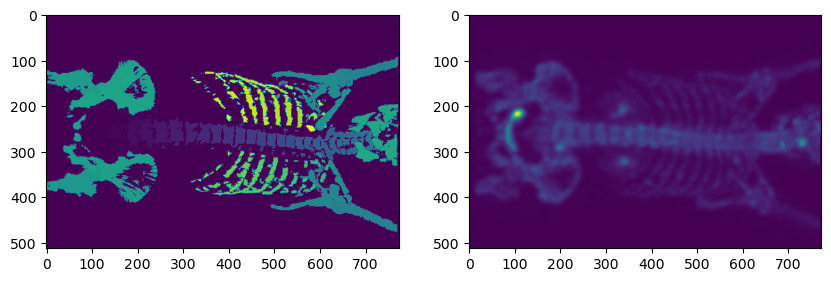

In [18]:
bone_real = mat_file["MIP"][:, :, 2, 0]

# bone each, bone real을 나란히 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bone_each)

plt.subplot(1, 2, 2)
plt.imshow(bone_real)

plt.show()

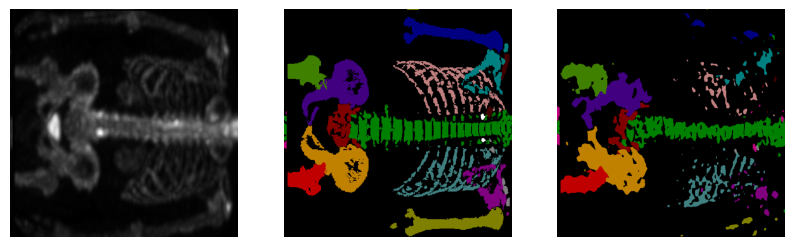

In [29]:
orig_file = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/1018_0434_result/original_image.png"
label_file = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/1018_0434_result/label_image.png"
gen_file = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/1017_1556_result/gen_image_6570.png"

orig_img = Image.open(orig_file)
label_img = Image.open(label_file)
gen_img = Image.open(gen_file)

# 저 9개 중에 2번째 것만 잘라서

orig_img = orig_img.crop((1536, 512, 2048, 1024))
label_img = label_img.crop((1536, 512, 2048, 1024))
gen_img = gen_img.crop((1536, 512, 2048, 1024))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(label_img)

# 눈금자 없애기
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gen_img)
plt.axis("off")

plt.show()

In [8]:
# 두 numpy array가 같은지 확인


np.array_equal(bone_group, bone_each)

True

In [9]:
max(bone_group.flatten())

62.0

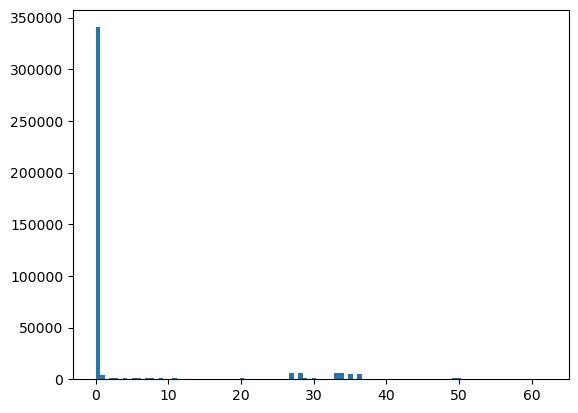

In [10]:
# flatten해서 히스토그램 그려보기
import matplotlib.pyplot as plt

plt.hist(bone_group.flatten(), bins=100)
plt.show()

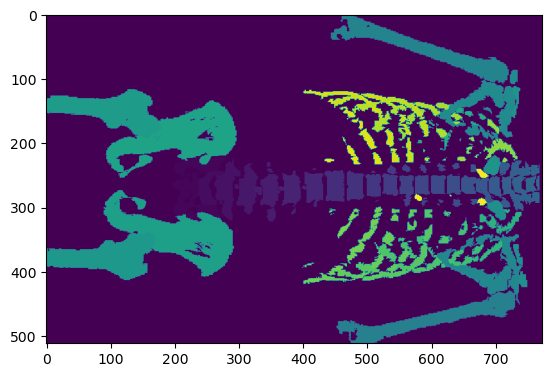

In [4]:
plt.imshow(bone_each)

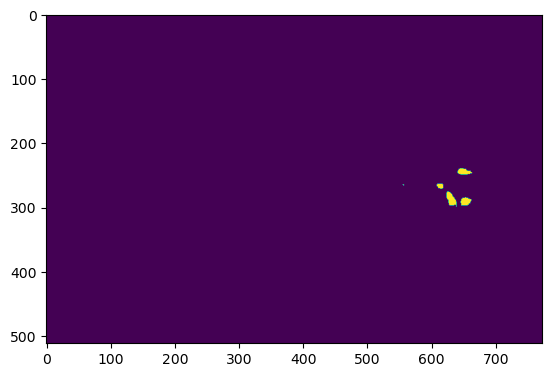

In [91]:
# bone_each에서 원래 이미지와 값이 17~20에 해당하는 부위만 색칠한 것 2장을 비교 출력
from PIL import Image
from PIL import ImageDraw

thres_min = 62
thres_max = 62

trim = bone_each.copy()
trim[trim < thres_min] = 0
trim[trim > thres_max] = 0


plt.imshow(trim)

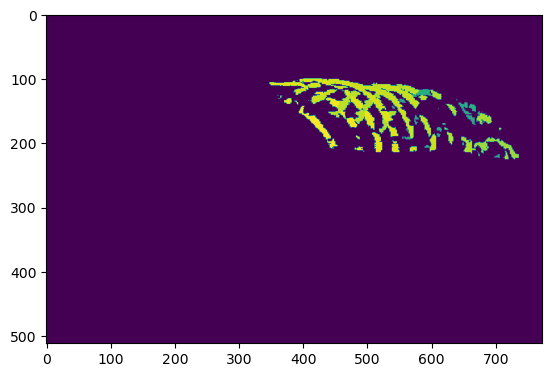

In [97]:
# 38~39 or 52~61 범위를 갖는 부분만 bone_each에서 추출
bone_each_trim = bone_each.copy()
bone_each_trim[(bone_each_trim < 38) | (bone_each_trim > 61)] = 0
bone_each_trim[(bone_each_trim > 39) & (bone_each_trim < 52)] = 0

plt.imshow(bone_each_trim)

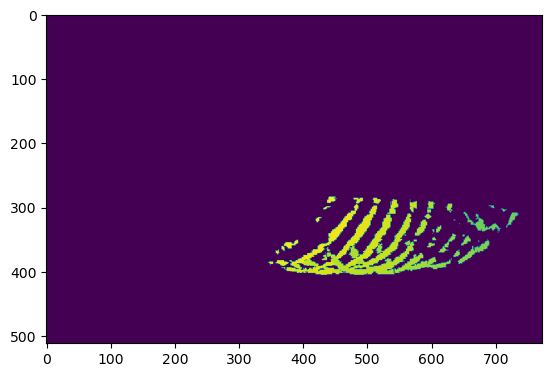

In [98]:
bone_each_LRib = bone_each.copy()
bone_each_LRib[(bone_each_LRib < 40) | (bone_each_LRib > 51)] = 0

plt.imshow(bone_each_LRib)

In [19]:
# bone_each에서 같은 그룹은 같은 값으로 지정해서 group image를 새로 만드는 매핑
"""
1 : 'Sacrum'
2~26 : 'Vertebra'
27 : 'Humerus Left'
28 : 'Humerus Right'
29 : 'Scapula Left'
30 : 'Scapula Right'
31 : 'Clavicle Left'
32 : 'Clavicle Right'
33 : 'Femur Left'
34 : 'Femur Right'
35 : 'Hip Left'
36 : 'Hip Right'
37 : 'skull' 
40~51 : 'Rib Left'
38~39, 52~61 : 'Rib Right'
62 : 'Sternum'
"""
region_mapping = {
    0: "background",
    1: "Sacrum",
    2: "Vertebra",
    3: "Humerus Left",
    4: "Humerus Right",
    5: "Scapula Left",
    6: "Scapula Right",
    7: "Clavicle Left",
    8: "Clavicle Right",
    9: "Femur Left",
    10: "Femur Right",
    11: "Hip Left",
    12: "Hip Right",
    13: "skull",
    14: "Rib Left",
    15: "Rib Right",
    16: "Sternum",
}

# for문을 통해 mapping 딕셔너리에 값 집어넣기
mapping = {}
for i in range(0, 63):
    if i == 0:
        mapping[i] = 0
    elif i == 1:
        mapping[i] = 1
    elif i > 1 and i < 27:
        mapping[i] = 2
    elif i == 27:
        mapping[i] = 3
    elif i == 28:
        mapping[i] = 4
    elif i == 29:
        mapping[i] = 5
    elif i == 30:
        mapping[i] = 6
    elif i == 31:
        mapping[i] = 7
    elif i == 32:
        mapping[i] = 8
    elif i == 33:
        mapping[i] = 9
    elif i == 34:
        mapping[i] = 10
    elif i == 35:
        mapping[i] = 11
    elif i == 36:
        mapping[i] = 12
    elif i == 37:
        mapping[i] = 13
    elif i > 37 and i < 40:
        mapping[i] = 15
    elif i > 39 and i < 52:
        mapping[i] = 14
    elif i > 51 and i < 62:
        mapping[i] = 15
    elif i == 62:
        mapping[i] = 16

In [28]:
bone_each.shape

(512, 773)

In [29]:
bone_group = np.zeros((bone_each.shape[0], bone_each.shape[1]), dtype=np.uint8)
for k in mapping:
    bone_group[bone_each == k] = mapping[k]

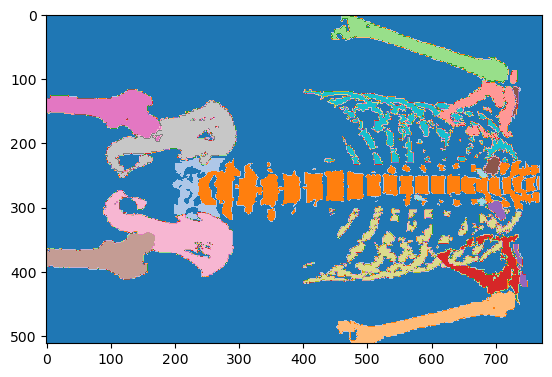

In [31]:
plt.imshow(bone_group, cmap="tab20")

In [32]:
bone_group.shape

(512, 773)

In [36]:
# 일단 anterior 즉 3번째 영상만 고려하자
# mat_files에서 3번째 영상만 고려해서 bone_group 만들고 data폴더에 ANT 폴더에 저장

for i in range(len(mat_files)):
    mat_file = sio.loadmat(os.path.join(path, mat_files[i]))
    bone_each = mat_file["MIP"][:, :, 2, 1]
    bone_group = np.zeros((bone_each.shape[0], bone_each.shape[1]), dtype=np.uint8)
    for k in mapping:
        bone_group[bone_each == k] = mapping[k]
    Image.fromarray(bone_group).save(
        os.path.join(
            "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT",
            mat_files[i][:-4] + ".png",
        )
    )

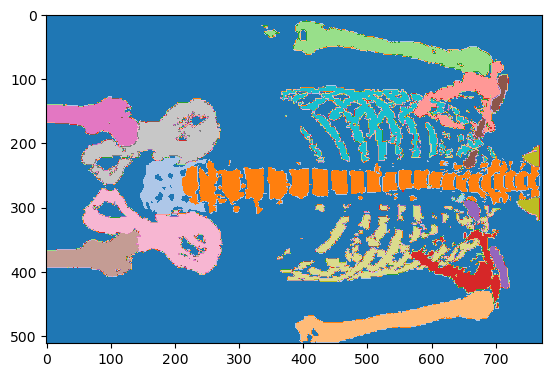

In [68]:
# 잘 저장되었는지 이미지로 확인
path = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT"
files = os.listdir(path)
random_idx = np.random.randint(0, len(files))
random_file = files[random_idx]

img = Image.open(os.path.join(path, random_file))
plt.imshow(img, cmap="tab20")

In [9]:
# 원본 이미지도 SPECT 폴더에 저장

for i in range(len(mat_files)):
    mat_file = sio.loadmat(os.path.join(path, mat_files[i]))
    bone_group = mat_file["MIP"][:, :, 2, 0]
    # npy로 저장
    np.save(
        os.path.join(
            "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT",
            mat_files[i][:-4] + ".npy",
        ),
        bone_group,
    )

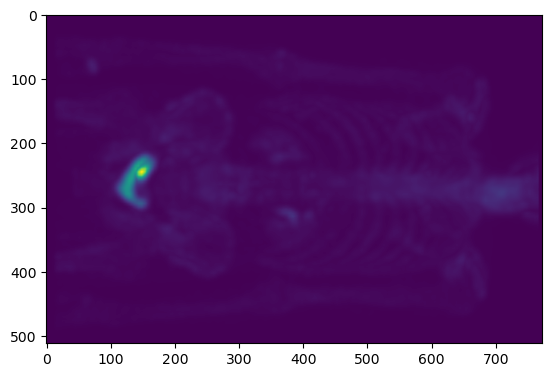

In [14]:
# 잘 저장되었는지 이미지로 확인
path = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT"
files = os.listdir(path)
random_idx = np.random.randint(0, len(files))

random_file = files[random_idx]
img = np.load(os.path.join(path, random_file))
plt.imshow(img)

In [22]:
img.dtype

dtype('float64')

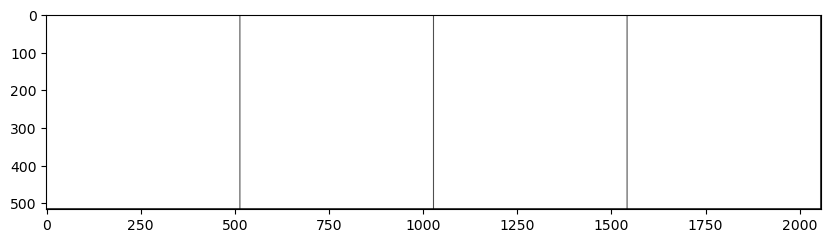

In [28]:
# result 폴더에서 label_image들을 랜덤으로 뽑아서 보기

path = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/result"
files = os.listdir(path)
label_files = [f for f in files if re.match(".*label_image.*", f)]
random_idx = np.random.randint(0, len(label_files))

random_file = label_files[random_idx]
img = Image.open(os.path.join(path, random_file))
# 좀 크게 보기
plt.figure(figsize=(10, 10))
# rgb로 보기
plt.imshow(img)

In [31]:
array = np.array(img)
array[40, 35]

array([255, 255, 255], dtype=uint8)

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
from model_unet import *
from datasets import BoneSegmentDataset
from tqdm.notebook import tqdm
from PIL import Image
from torch.utils.data import DataLoader, Subset

In [3]:
datadir = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT"
date = "1017_1556"
file_model = f"./{date}_unet.pkl"

num_classes = 17

In [4]:
dataset = BoneSegmentDataset(datadir, augment=True)

train_data = Subset(dataset, range(90))
validation_data = Subset(dataset, range(90, len(dataset)))

validation_data.augment = False

In [5]:
net = UnetGenerator(1, num_classes, 64)


model_dict = torch.load(
    "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/1029_2047_models/1029_2047_unet_1000.pkl"
)
# scheduler.load_state_dict(model_dict["scheduler_state_dict"])
net.load_state_dict(model_dict["model_state_dict"])

<All keys matched successfully>

In [7]:
orig_img, orig_label = next(iter(train_data))

gen_img = net(orig_img.unsqueeze(0))

In [8]:
gen_img.size()

torch.Size([1, 17, 512, 512])

In [18]:
y_threshed = torch.zeros((gen_img.size()[0], 3, gen_img.size()[2], gen_img.size()[3]))
for idx in range(0, gen_img.size()[0]):
    maxindex = torch.argmax(gen_img[idx], dim=0).int()
    y_threshed[idx] = dataset.class_to_rgb(maxindex)

In [29]:
orig_label.size()

torch.Size([512, 512])

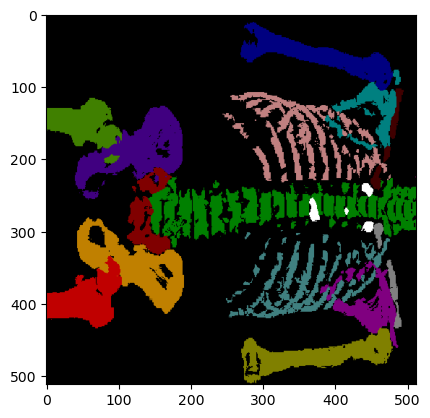

In [33]:
# y_threshed_orig = torch.zeros((gen_img.size()[0], 3, gen_img.size()[2], gen_img.size()[3]))

y_threshed_orig = dataset.class_to_rgb(orig_label)
y_threshed_orig.size()
plt.imshow(y_threshed_orig.permute(1, 2, 0))

In [21]:
# iter_data = iter(train_data)
iter_data = iter(validation_data)

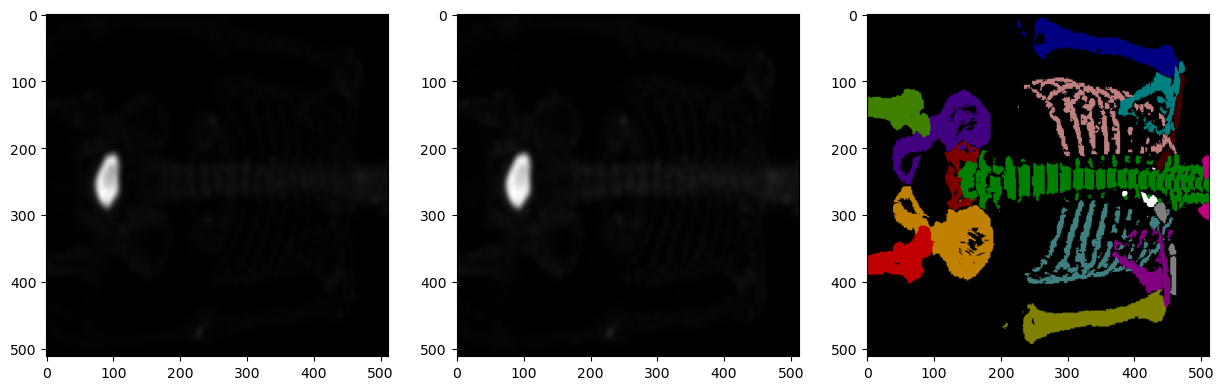

In [31]:
orig_img, orig_label = next(iter_data)

mod_img = orig_img
mod_img /= torch.max(mod_img)
# tanh 통과시킴
mod_img = torch.tanh(mod_img)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(orig_img[0], cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(mod_img[0], cmap="gray")

plt.subplot(1, 3, 3)
y_threshed_orig = dataset.class_to_rgb(orig_label)
y_threshed_orig.size()
plt.imshow(y_threshed_orig.permute(1, 2, 0))

In [ ]:
a = torch.randn(256, 256)

# a 이미지를 90도 회전
a_rot = torch.rot90(a, 1, [0, 1])

# y_threshed[0].permute(1, 2, 0)를 torch uint8로 변환
y_threshed[0].permute(1, 2, 0).type(torch.uint8)

Text(0.5, 1.0, '(c)')

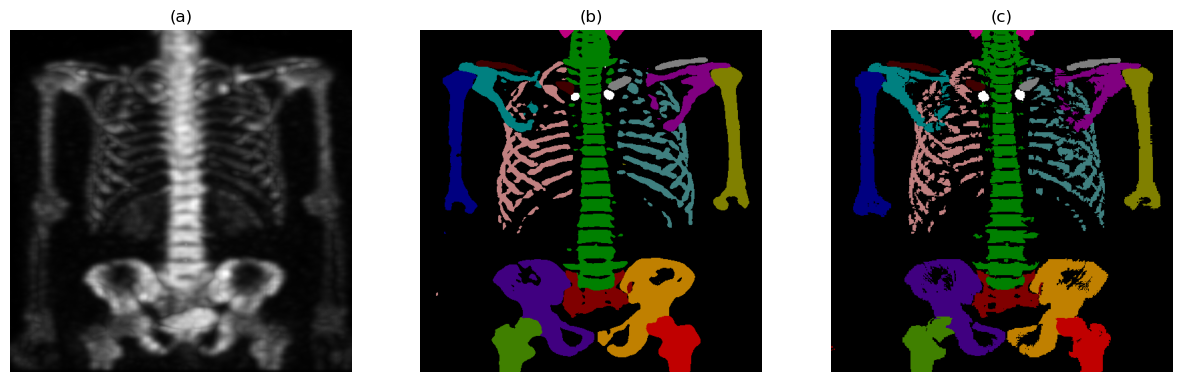

In [ ]:
orig_img, orig_label = next(iter_data)

gen_img = net(orig_img.unsqueeze(0))

y_threshed = torch.zeros((gen_img.size()[0], 3, gen_img.size()[2], gen_img.size()[3]))
for idx in range(0, gen_img.size()[0]):
    maxindex = torch.argmax(gen_img[idx], dim=0).int()
    y_threshed[idx] = dataset.class_to_rgb(maxindex)


# subplot 3개를 세로로 나란히 그리기

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(torch.rot90(orig_img[0], 1, [0, 1]), cmap="gray")
plt.axis("off")
# 축 제목 (a) 로 작성하기, 그림 밑에 넣기

plt.title("(a)")


plt.subplot(1, 3, 2)

plt.imshow(torch.rot90(y_threshed[0].permute(1, 2, 0).type(torch.uint8), 1, [0, 1]))
plt.axis("off")

plt.title("(b)")

plt.subplot(1, 3, 3)

y_threshed_orig = dataset.class_to_rgb(orig_label)
y_threshed_orig.size()
plt.imshow(torch.rot90(y_threshed_orig.permute(1, 2, 0), 1, [0, 1]))
plt.axis("off")

plt.title("(c)")

In [36]:
import pandas as pd

In [37]:
df_merge = pd.read_excel("../../crop_multithres_label.xlsx")

In [38]:
df_nor = df_merge[df_merge["real_label"] == 0]

In [39]:
df_nor.reset_index(drop=True, inplace=True)

In [40]:
df_nor

,real_label,path,awkward,head,feet,threshold_low,threshold_high,height,patNo,description,gender,age,category,category_kr
0,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/NOR_xpur...,0,47,858,22.425495,328.696069,811,1,Tc-99m HDP was given intravenously to the pati...,남,55.0,CA,종양내과
1,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/NOR_xpur...,0,48,886,11.931374,165.299393,838,3,Tc-99m HDP was given intravenously to the pati...,남,71.0,UR,비뇨의학과
2,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/NOR_xpur...,0,147,880,8.366604,134.940181,733,5,Hx: Prostate cancer\nPSA 1.25 (2016-08-28)\n\n...,남,53.0,UR,비뇨의학과
3,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/NOR_xpur...,0,58,863,14.244114,210.530495,805,6,\nHx: Advanced gastric cancer \n\nTechnique:\n...,남,61.0,CA,종양내과
4,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/NOR_xpur...,0,145,879,8.193426,145.502115,734,7,Hx: Prostate cancer\n\nTechnique:\nTc-99m HDP ...,남,68.0,UR,비뇨의학과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/pure_NOR...,0,97,921,7.642420,109.155042,824,20994,\nTechnique:\nTc-99m HDP was given to the pati...,남,NaN,M9,류마티스내과
17256,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/pure_NOR...,0,97,786,13.361507,243.405741,689,20997,"\nHx: Breast cancer, right\n\nTechnique:\nTc-9...",여,NaN,G7,유방외과
17257,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/pure_NOR...,0,40,915,9.222048,144.287277,875,21033,Hx: Ankylosing spondylitis\n\nTechnique:\nTc-9...,남,NaN,M9,류마티스내과
17258,0,/projects3/pi/nhcho/Sev_WBBS/wbbs-npy/pure_NOR...,0,145,871,4.215895,82.235964,726,21084,Hx: Ankylosing spondylitis\n\nTechnique:\nTc-9...,남,NaN,M9,류마티스내과


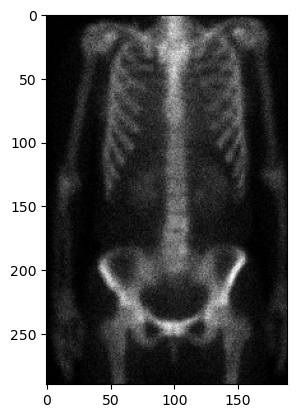

In [87]:
idx = 11


WBBS_path = df_nor.loc[idx, "path"]
low = df_nor.loc[idx, "threshold_low"]
high = df_nor.loc[idx, "threshold_high"]

wbbs_npy = np.load(WBBS_path).astype(np.float32)
# wbbs_npy -= low
# wbbs_npy /= high - low
# wbbs_npy = np.tanh(wbbs_npy)


wbbs_npy = wbbs_npy[260:550, 33:222, 0]
wbbs_npy /= np.max(wbbs_npy)
wbbs_npy = np.tanh(wbbs_npy)
plt.imshow(wbbs_npy, cmap="gray")

In [88]:
wbbs_npy.shape

(290, 189)

In [89]:
import torchvision.transforms.functional as TF

In [90]:
wbbs_torch = TF.to_tensor(wbbs_npy)

In [91]:
wbbs_torch.size()

torch.Size([1, 290, 189])

In [92]:
image_tensor = TF.resize(
    wbbs_torch,
    size=(512, 512),
    interpolation=transforms.InterpolationMode.BILINEAR,
)

In [93]:
image_tensor.size()

torch.Size([1, 512, 512])

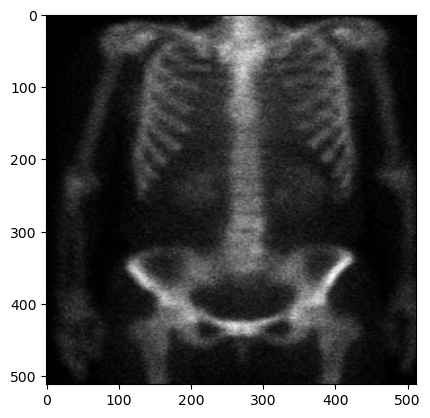

In [94]:
plt.imshow(image_tensor[0], cmap="gray")

In [98]:
net = UnetGenerator(1, num_classes, 32)


model_dict = torch.load(
    "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/scripts/1030_1030_models/1030_1030_unet_1500.pkl"
)
# scheduler.load_state_dict(model_dict["scheduler_state_dict"])
net.load_state_dict(model_dict["model_state_dict"])
net.eval()
print("finished")

finished


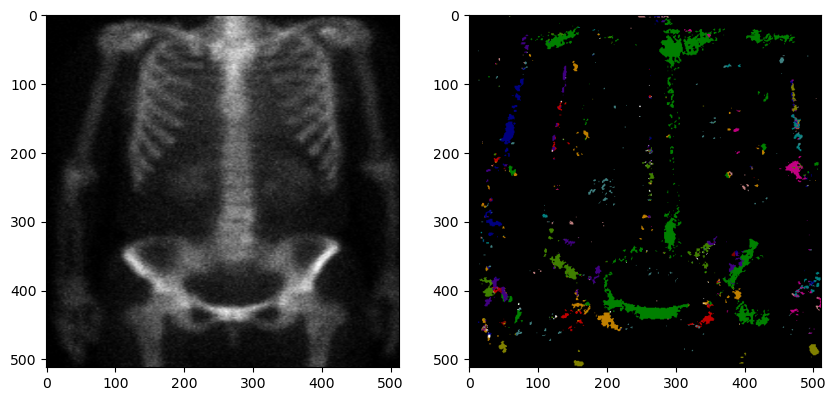

In [100]:
orig_img = image_tensor

gen_img = net(orig_img.unsqueeze(0))

y_threshed = torch.zeros((gen_img.size()[0], 3, gen_img.size()[2], gen_img.size()[3]))
for idx in range(0, gen_img.size()[0]):
    maxindex = torch.argmax(gen_img[idx], dim=0).int()
    y_threshed[idx] = dataset.class_to_rgb(maxindex)

# subplot 3개를 나란히 그리기

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(orig_img[0], cmap="gray")

plt.subplot(1, 2, 2)

plt.imshow(y_threshed[0].permute(1, 2, 0).numpy().astype(np.uint8))


# plt.subplot(1, 3, 3)

# y_threshed_orig = dataset.class_to_rgb(orig_label)
# y_threshed_orig.size()
# plt.imshow(y_threshed_orig.permute(1, 2, 0))

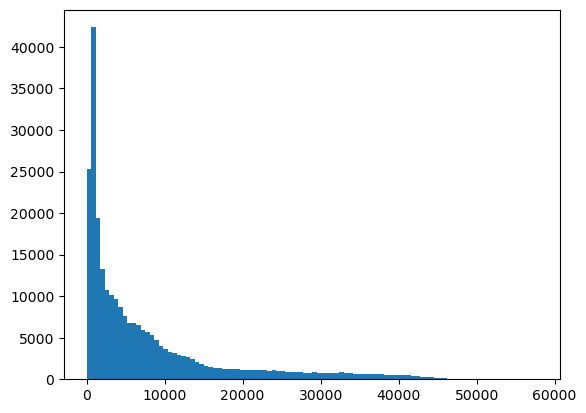

In [134]:
# orig_img의 히스토그램을 그려보자

plt.hist(orig_img[0].flatten(), bins=100)
plt.show()

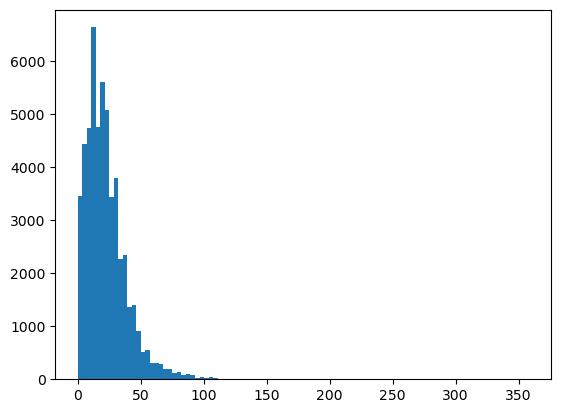

In [131]:
plt.hist(wbbs_npy.flatten(), bins=100)
plt.show()

In [6]:
import natsort

In [7]:
images = []
targets = []

images_dir = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/"
targets_dir = "/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/"

images_dir_list = natsort.natsorted(os.listdir(images_dir))

for path in images_dir_list:
    images.append(os.path.join(images_dir, path))

targets_dir_list = natsort.natsorted(os.listdir(targets_dir))

for path in targets_dir_list:
    targets.append(os.path.join(targets_dir, path))

In [8]:
images

['/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/1682577_230119_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/2132762_230216_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/2257183_220210_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/2334309_230119_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3374868_220214_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3497581_221114_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3506602_221227_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3690086_220308_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3856470_221223_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3897718_220328_mip.npy',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/SPECT/3991651_240112_mip.npy',

In [9]:
targets

['/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/1682577_230119_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/2132762_230216_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/2257183_220210_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/2334309_230119_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3374868_220214_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3497581_221114_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3506602_221227_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3690086_220308_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3856470_221223_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3897718_220328_mip.png',
 '/projects3/pi/nhcho/Sev_WBBS/skhyun/segmentation/data/ANT/target/3991651_24011